In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data_train = pd.read_csv('/content/drive/My Drive/Kaggle/train.csv')
data_test = pd.read_csv('/content/drive/My Drive/Kaggle/test.csv')

In [ ]:
import numpy as np
import pandas as pd

def hot_encoding(col_name,data):
    for i in range(0,len(col_name)):
        unique= pd.unique(data[col_name[i]])
        unique = [x for x in unique if x == x]
        for j in range(0,len(unique)):
            arr = np.zeros(len(data[col_name[i]]))
            arr[np.where(unique[j] == data[col_name[i]])[0]] = 1
            df1 = pd.DataFrame(arr,columns= [unique[j]])
            data= pd.concat([data,df1], axis = 1)
        data = data.drop(col_name[i], axis = 1)
    return data

categorical_var= ['Embarked','Sex']

data1 = hot_encoding(categorical_var, data_train)
data_test = hot_encoding(categorical_var, data_test)
#print(data1)
#print(data1.columns)

drop_vals = ['PassengerId','Ticket','Cabin','Parch','Name']
#drop_vals = ['Ticket','Cabin','Parch','Name','SibSp','S', 'C', 'Q']
data1 = data1.drop(drop_vals, axis = 1)
data_test = data_test.drop(drop_vals, axis = 1)
features = list(data1.columns)
features.remove('Survived')

for i in range(0,len(features)):
  data1[features[i]] = data1[features[i]].replace(np.nan,np.mean(data1[features[i]]))
  data_test[features[i]] = data_test[features[i]].replace(np.nan,np.mean(data_test[features[i]]))

print(features)

['Pclass', 'Age', 'SibSp', 'Fare', 'S', 'C', 'Q', 'male', 'female']


In [ ]:
###Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data1[features],data1["Survived"],random_state=42,test_size=0.2)

model = RandomForestClassifier(n_estimators=150, max_depth=6, random_state=1)
model.fit(X_train, y_train)

for i in range(0,150):
  estimator = model.estimators_[i]
  df1 = pd.DataFrame(estimator.predict(X_train))
  df2 = pd.DataFrame(estimator.predict(X_test))
  if i ==0:
    data_f= pd.DataFrame(estimator.predict(X_train))
    data_f_test= pd.DataFrame(estimator.predict(X_test))
  else:
    data_f= pd.concat([data_f,df1], axis = 1)
    data_f_test= pd.concat([data_f_test,df2], axis = 1)

#estimator = model.estimators_[5]
#print(estimator.predict(X_train))
#print(estimator)
print(data_f)
print(data_f_test)

predictions = model.predict(X_test)
#output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
err = np.sum(np.abs(np.array(y_test)  - np.array(predictions)))/len(y_test)
print(1-err)

In [ ]:
f = np.where(data1["female"] == 1)[0]
c = np.where(data1["Pclass"] == 1)[0]
s = np.where(data1["Survived"] == 1)[0]

t = np.intersect1d(f,s)
tc = np.intersect1d(c,s)
tf = np.intersect1d(c,f)
print(len(s), len(t), len(tc), len(tf), len(data1))

342 233 136 94 891


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data1[features],data1["Survived"], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(data1[features])
#X_test_scaled = scaler.transform(data_test[features])
#y_train  = data1["Survived"]

#print(X_train_scaled)
#print(y_train)


In [ ]:
import tensorflow as tf
#tf.random.set_seed(42)

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dropout(0.4),
    #tf.keras.layers.Dense(256, activation='relu'),#tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(256, activation='relu'),#tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(254, activation='relu'),#tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

epoch = 100
history = model.fit(data_f, y_train, epochs=epoch)
#history = model.fit(X_train_scaled, y_train, epochs=epoch)

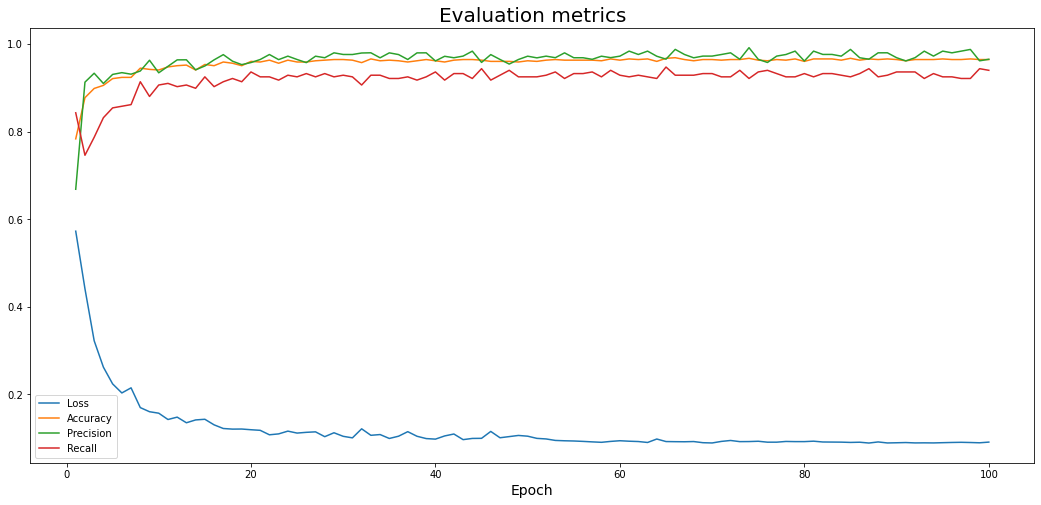

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)

plt.plot(np.arange(1, epoch+1), history.history['loss'], label='Loss')
plt.plot(np.arange(1, epoch+1), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, epoch+1), history.history['precision'], label='Precision')
plt.plot(np.arange(1, epoch+1), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
#predictions = model.predict(X_test_scaled)
predictions = model.predict(data_f_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
print(prediction_classes)

[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.79
Precision: 0.74
Recall: 0.77
